# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)
# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,410,89,45,77,188,64,9,161,41,20,151,190,390,174,66,4,2,194,201
1,280,100,44,93,193,62,8,186,35,22,147,202,521,151,66,0,2,193,198
2,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
3,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
4,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197
5,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202
6,487,93,45,81,177,64,7,160,41,20,147,180,383,188,70,11,11,192,199
7,222,100,50,81,197,67,6,186,34,22,158,206,531,198,74,6,1,197,198
8,687,106,57,107,235,67,6,262,26,28,171,285,987,260,86,9,31,180,184
9,579,84,38,66,138,62,6,126,54,18,132,144,232,139,70,4,7,185,190


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.617486,93.537341,44.653916,81.686703,168.375228,61.664845,8.493625,168.216758,41.083789,20.531876,147.526412,188.145719,436.550091,173.952641,72.675774,6.313297,12.876138,188.894353,195.479053
std,248.054877,8.231647,6.196338,15.822355,33.905749,7.762009,4.585607,32.946462,7.847328,2.544743,14.598199,31.602121,174.755867,32.936035,7.670006,5.017508,9.000971,6.215690,7.421980
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,213.000000,87.000000,39.000000,70.000000,140.000000,57.000000,6.000000,147.000000,33.000000,19.000000,136.000000,167.000000,318.000000,147.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,430.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,641.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,215.000000,576.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,410,89,45,77,188,64,9,161,41,20,151,190,390,174,66,4,2,194,201
1,280,100,44,93,193,62,8,186,35,22,147,202,521,151,66,0,2,193,198
2,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
3,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
4,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197


In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pd))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_pd))


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score


In [9]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3, 3, 7), 
}

clf = GridSearchCV(logreg, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [10]:
clf.fit(X_train_pd, y_train_pd)

/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [11]:
best_clf = clf.best_estimator_

y_pred = best_clf.predict(X_test_pd)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")

Accuracy: 0.7104377104377104
f1_score: [0.85714286 0.51851852 0.55405405 0.87898089]


In [12]:
from scikitplot.metrics import plot_roc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

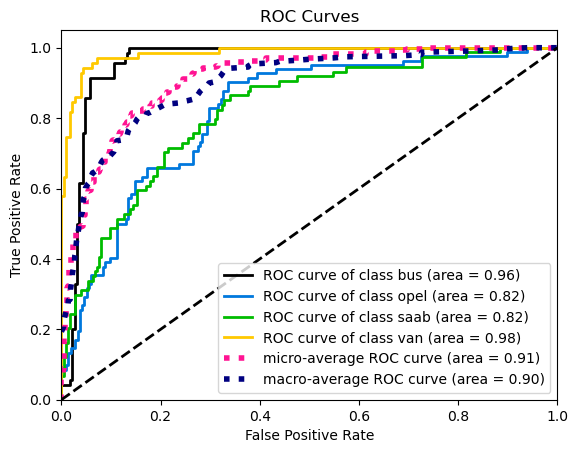

In [13]:
plot_roc(y_test_pd, best_clf.predict_proba(X_test_pd))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [14]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Text(0, 0.5, 'cumulative explained variance')

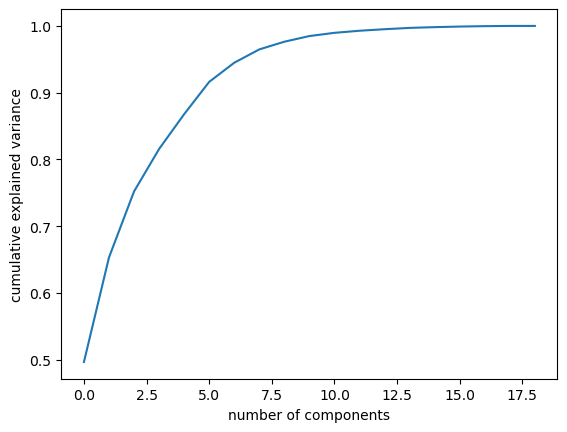

In [15]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [65]:
### YOUR CODE HERE
pca = PCA(n_components = 11)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

pca = PCA(n_components = 11)
X_test_pca = pd.DataFrame(pca.fit_transform(X_test_scaled))

X_train_pca.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-0.111300,-1.118165,0.444272,0.780275,-0.590991,-1.282508,-0.207708,-0.264080,0.337658,0.330289,0.137459
1,1.227371,-1.073288,-0.127832,-0.388079,-1.160692,-1.566390,0.469170,1.054376,0.464141,-0.451857,0.277195
2,5.344018,-1.864237,-0.288685,1.043060,0.201227,2.736483,0.305567,0.186858,-0.393591,-0.626385,-0.675120
3,0.728035,-2.363800,-0.241823,1.503291,-0.793226,0.597831,-0.156015,0.084566,-0.309151,0.178008,0.005071
4,0.520735,-1.623694,0.618495,-0.929393,-0.807137,0.442495,1.896599,-0.239632,-0.559246,-0.107934,0.302724


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Accuracy: 0.5521885521885522
f1_score: [0.47619048 0.46043165 0.49350649 0.76623377]
best_params: {'C': 0.1, 'penalty': 'l2'}


/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

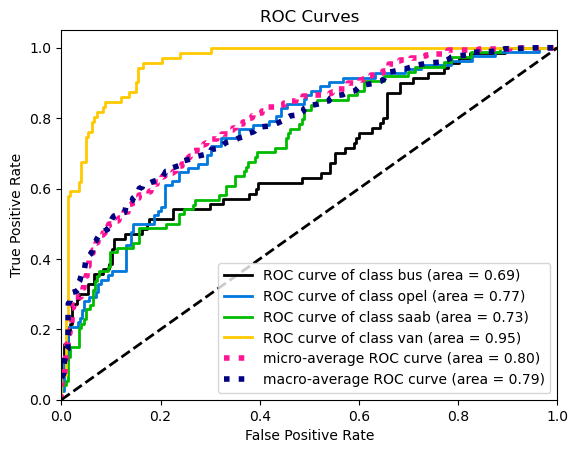

In [66]:
### YOUR CODE HERE
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3, 3, 7), 
}

clf = GridSearchCV(logreg, param_grid = parameters, scoring = 'accuracy', cv = 10)

clf.fit(X_train_pca, y_train_pd)

best_clf = clf.best_estimator_

y_pred = best_clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")
print(f"best_params: {clf.best_params_}")

plot_roc(y_test_pd, best_clf.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Accuracy: 0.494949494949495
f1_score: [0.51388889 0.40764331 0.4375     0.64661654]
Best params: {'max_depth': 74}


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

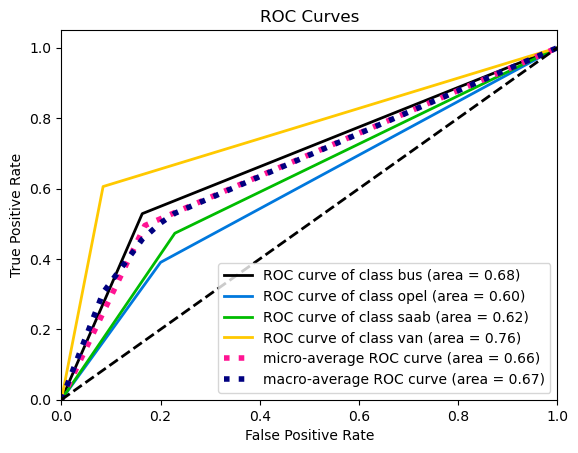

In [67]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dec_tree = DecisionTreeClassifier()

parameters = {
    'max_depth': np.arange(1, 100, 1) 
}

clf = GridSearchCV(dec_tree, param_grid = parameters, scoring = 'accuracy', cv = 10)

clf.fit(X_train_pca, y_train_pd)

best_clf = clf.best_estimator_

y_pred = best_clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")

print(f"Best params: {clf.best_params_}")

plot_roc(y_test_pd, best_clf.predict_proba(X_test_pca))


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [68]:
from sklearn.ensemble import BaggingClassifier

/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: 

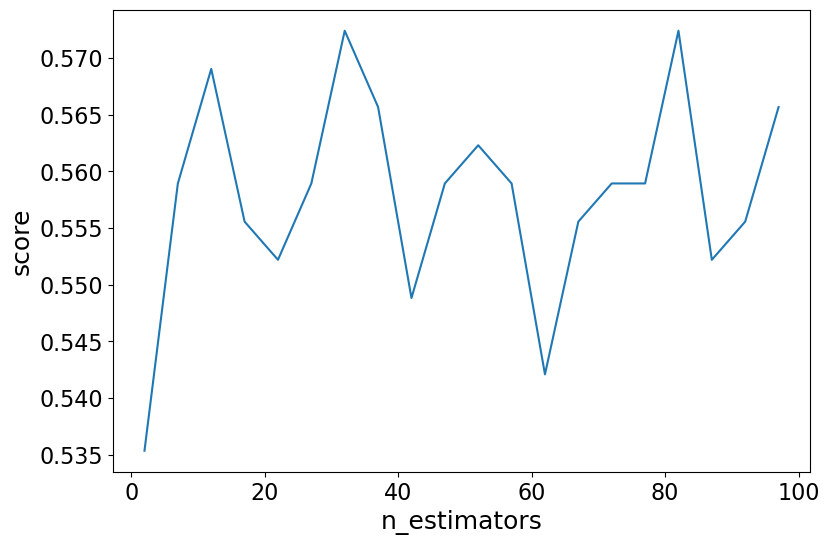

In [80]:
# YOUR CODE HERE
logreg = LogisticRegression(penalty='l2', C=0.1)

estimator_range = np.arange(2, 100, 5)

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(estimator=LogisticRegression(penalty='l1', C=0.1, solver='saga', multi_class='multinomial', tol=1e-3), n_estimators=n_estimators)
    clf.fit(X_train_pca, y_train_pd)

    models.append(clf)
    scores.append(accuracy_score(y_pred=clf.predict(X_test_pca), y_true=y_test_pd))

best_clf = models[int(np.argmax(np.array(scores)))]

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

Accuracy: 0.5723905723905723
f1_score: [0.51006711 0.50359712 0.47887324 0.76829268]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

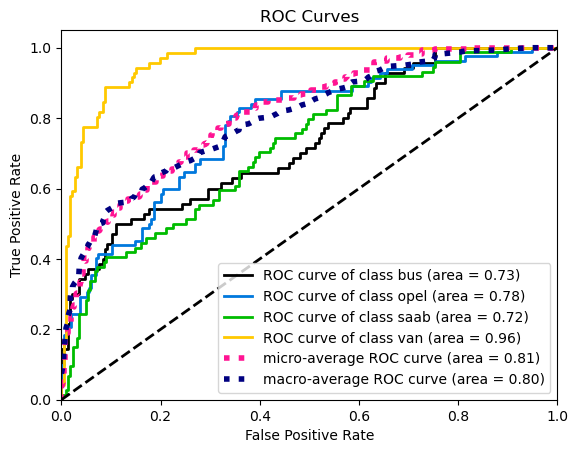

In [81]:
y_pred = best_clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")

plot_roc(y_test_pd, best_clf.predict_proba(X_test_pca))

/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

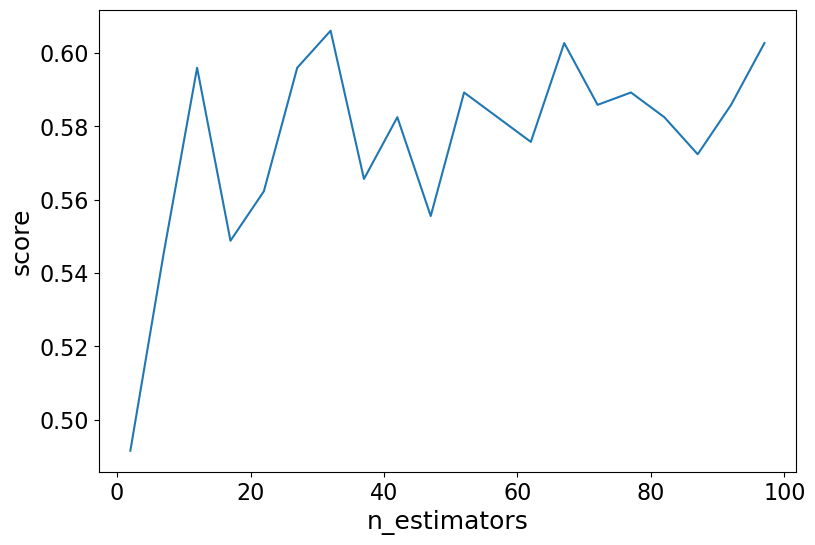

In [82]:
dec_tree = DecisionTreeClassifier(max_depth=74)

estimator_range = np.arange(2, 100, 5)

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(estimator=dec_tree, n_estimators=n_estimators)
    clf.fit(X_train_pca, y_train_pd)

    models.append(clf)
    scores.append(accuracy_score(y_pred=clf.predict(X_test_pca), y_true=y_test_pd))

best_clf = models[int(np.argmax(np.array(scores)))]

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

Accuracy: 0.6060606060606061
f1_score: [0.64       0.59354839 0.47058824 0.73529412]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

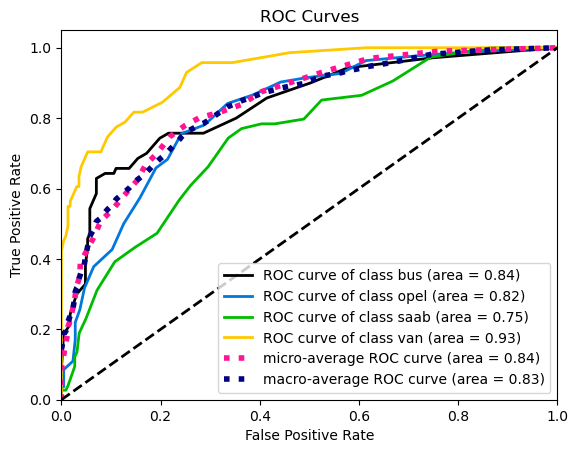

In [83]:
y_pred = best_clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")

plot_roc(y_test_pd, best_clf.predict_proba(X_test_pca))

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

/tmp/ipykernel_2564518/1819390079.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_pca, y_train_pd)
/tmp/ipykernel_2564518/1819390079.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_pca, y_train_pd)
/tmp/ipykernel_2564518/1819390079.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_pca, y_train_pd)
/tmp/ipykernel_2564518/1819390079.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_pca, y_train_pd)
/tmp/ipykernel_2564518/1819390079.py:13: DataConversionWarning: A column-vec

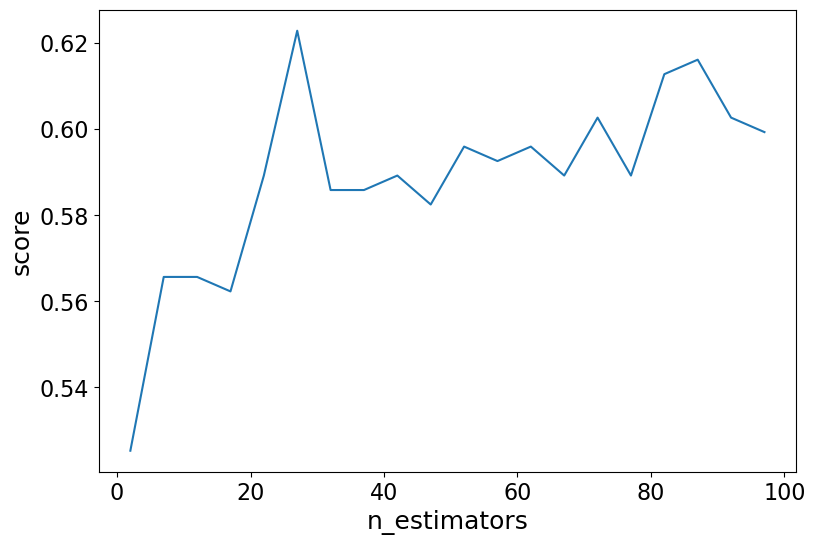

In [84]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
dec_tree = RandomForestClassifier(max_depth=74)

estimator_range = np.arange(2, 100, 5)

models = []
scores = []

for n_estimators in estimator_range:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train_pca, y_train_pd)

    models.append(clf)
    scores.append(accuracy_score(y_pred=clf.predict(X_test_pca), y_true=y_test_pd))

best_clf = models[int(np.argmax(np.array(scores)))]

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

In [85]:
print(f'Best numbers of estimarors: {estimator_range[np.argmax(scores)]}')

Best numbers of estimarors: 27


Accuracy: 0.622895622895623
f1_score: [0.66666667 0.58666667 0.51282051 0.73913043]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

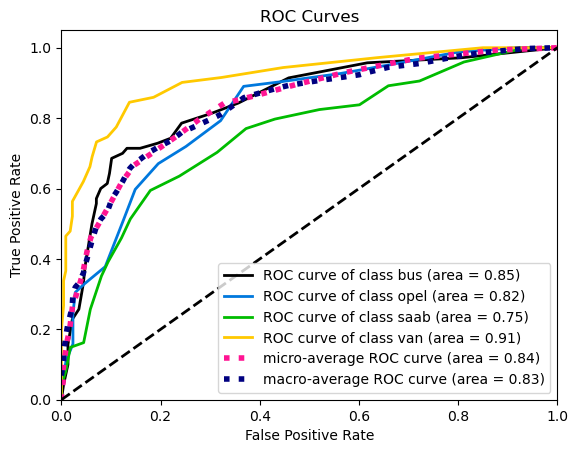

In [86]:
y_pred = best_clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pd, y_pred)}")
print(f"f1_score: {f1_score(y_test_pd, y_pred, average = None)}")

plot_roc(y_test_pd, best_clf.predict_proba(X_test_pca))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dimas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

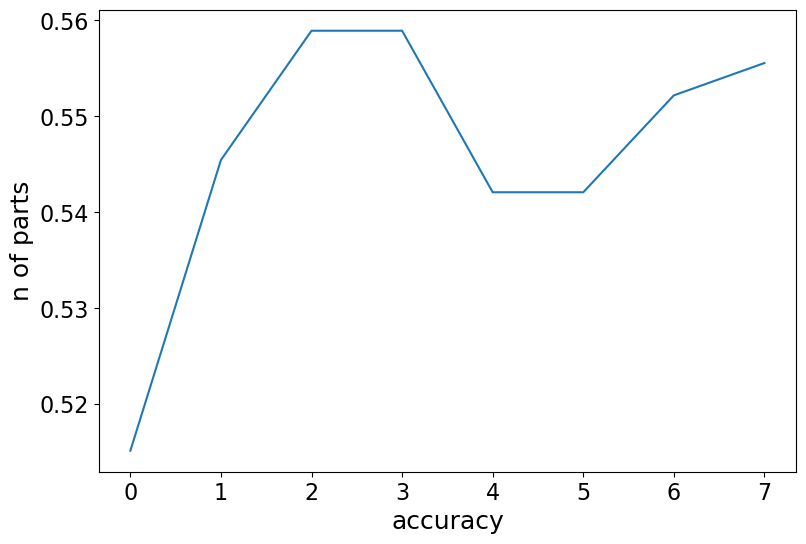

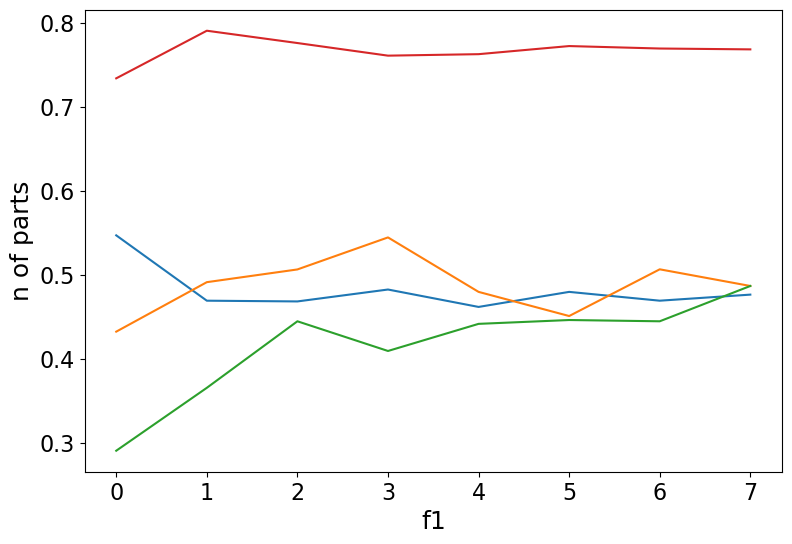

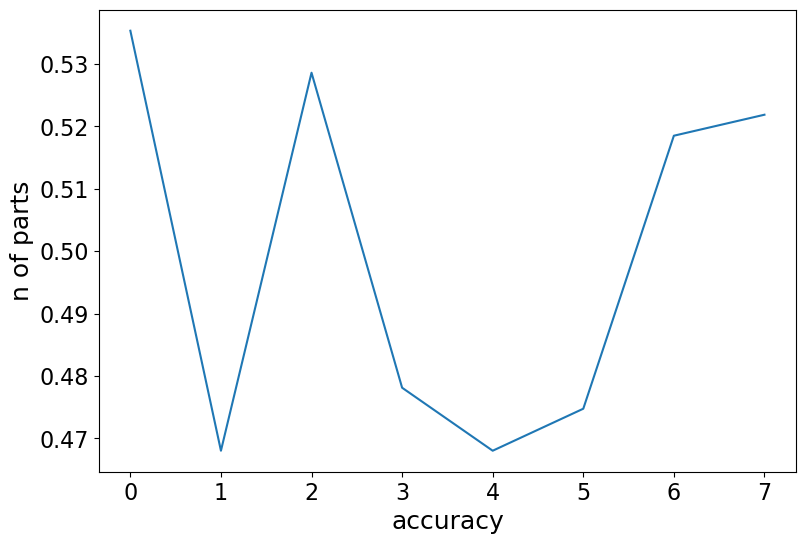

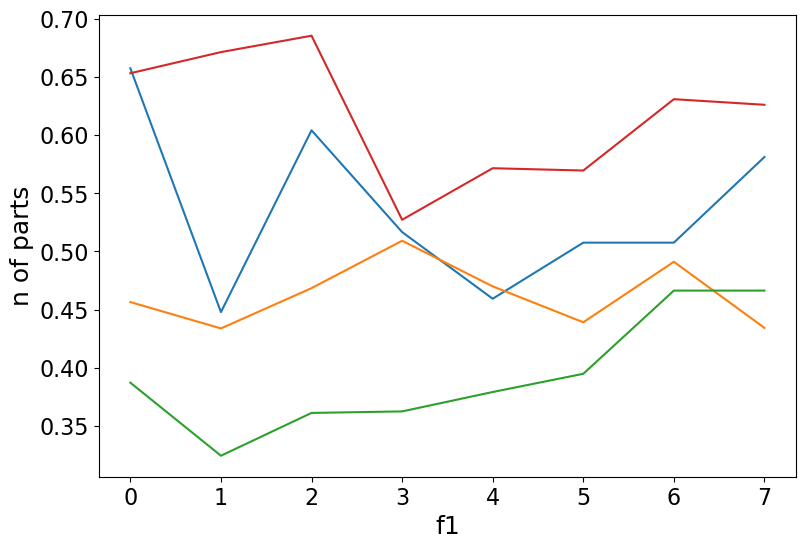

/tmp/ipykernel_2564518/3549618335.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca.iloc[range], y_train_pd.iloc[range])
/tmp/ipykernel_2564518/3549618335.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca.iloc[range], y_train_pd.iloc[range])
/tmp/ipykernel_2564518/3549618335.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca.iloc[range], y_train_pd.iloc[range])
/tmp/ipykernel_2564518/3549618335.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca.iloc[rang

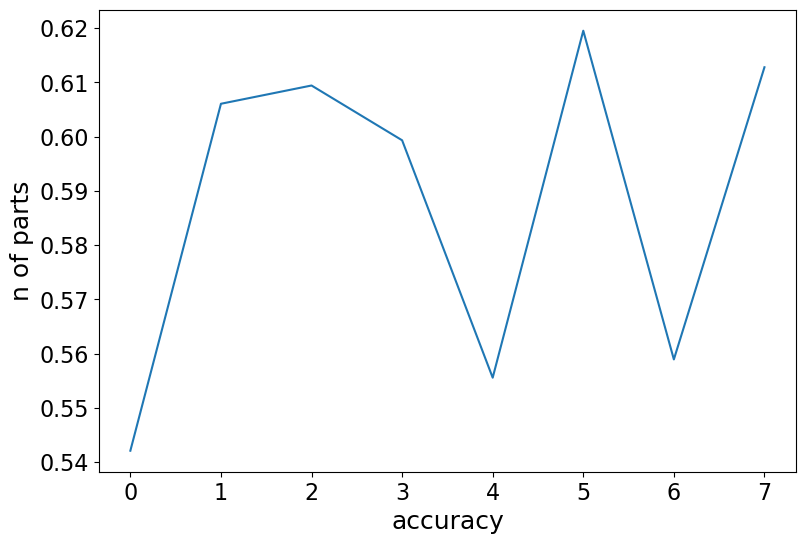

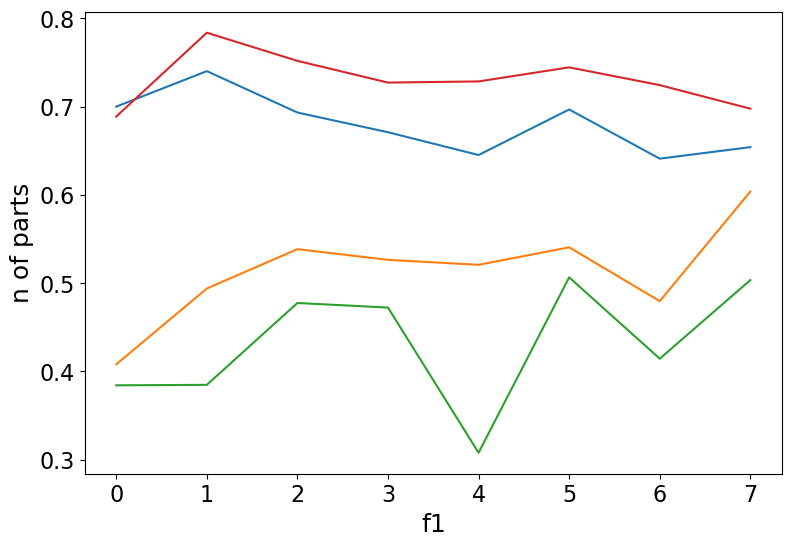

In [89]:
# YOUR CODE HERE
logreg = LogisticRegression(penalty='l2', C=0.1, solver='saga', multi_class='multinomial', tol=1e-3)
dec_tree = DecisionTreeClassifier(max_depth=74)
rand_forest = RandomForestClassifier(n_estimators=27, max_depth=74)

models = [logreg, dec_tree, rand_forest]

ranges= np.append(np.arange(1, 549, int(549 / 10))[2:], len(X_train_pd))

for model in models:
    accuracy_arr = []
    f1_arr = []
    
    for j in np.arange(1, 549, 549/10)[2:]:
        range = np.arange(0, j)
        model.fit(X_train_pca.iloc[range], y_train_pd.iloc[range])

        accuracy = accuracy_score(y_true=y_test_pd, y_pred=model.predict(X_test_pca))
        f1 = f1_score(y_true=y_test_pd, y_pred=model.predict(X_test_pca), average=None)

        accuracy_arr.append(accuracy)
        f1_arr.append(f1)

    plt.figure(figsize=(9,6))
    plt.plot(accuracy_arr)

    plt.xlabel("accuracy", fontsize = 18)
    plt.ylabel("n of parts", fontsize = 18)
    plt.tick_params(labelsize = 16)

    plt.show()

    plt.figure(figsize=(9,6))
    plt.plot(f1_arr)

    plt.xlabel("f1", fontsize = 18)
    plt.ylabel("n of parts", fontsize = 18)
    plt.tick_params(labelsize = 16)

    plt.show()
    
